<a href="https://colab.research.google.com/github/misfitclovers/PHYS3025Work/blob/main/Laplace's_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit
from mpl_toolkits import mplot3d

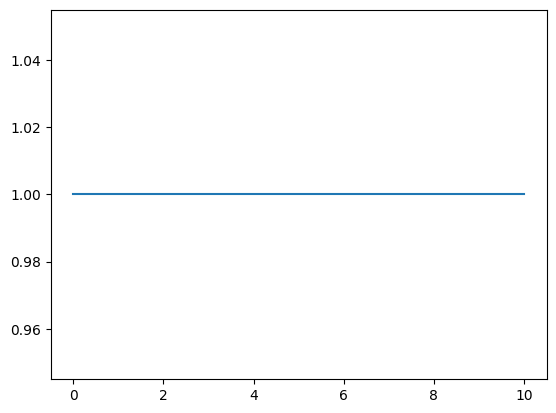

In [18]:
s= 10 #(box height)
l=100*s

edge =np.linspace(0,s,s)

top =np.zeros(l)*0
bottom =np.zeros(l)*0
leftside =1*np.ones(s)
rightside =0*np.zeros(s)

plt.plot(edge,leftside)

In [19]:
xV , yV =np.meshgrid(edge, 100*edge)

In [20]:
tol =1e-6 #tolerance


@numba.jit("f8[:,:](f8[:,:],i8)", nopython =True, nogil =True)
def compute_potential(potential , num_iter):
  length =len(potential[0])
  for n in range (num_iter):
    old_potential =np.copy(potential)
    for i in range (1, l-1):
      for j in range (1, s-1):
        potential[j][i] = 0.25*(potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    err =np.max(np.abs(old_potential - potential))
    if err < tol:
      print("The number of iterations to reach your tolerance is:" , n)
      break
  if err >=tol:
    print("You need more iterations to reach your tolerance")
  return potential

In [21]:
potential = 0.4*np.ones((s,l)) #initial guess of potential = 0.4
#Boundary conditions:
potential[0,:] = bottom
potential[-1,:] = top
potential[:,0] = leftside
potential[:,-1] = rightside


In [22]:
potential = compute_potential(potential, num_iter =171)

The number of iterations to reach your tolerance is: 170


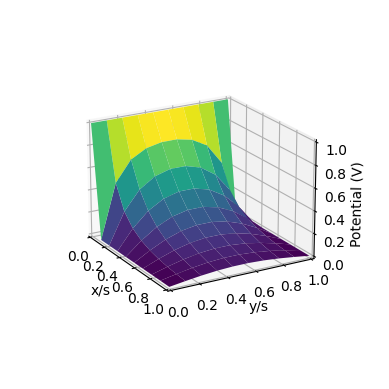

In [23]:
xs = xV[0:s,:]
ps = potential[:,0:s]

ax = plt.axes(projection='3d')
ax.plot_surface(xs/s, yV/l, ps, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.view_init(20, -30)
ax.set_box_aspect(aspect=None, zoom=0.7)
ax.margins(0,0,0)

ax.set_xlabel('x/s')
ax.set_ylabel('y/s')
ax.set_zlabel('Potential (V)');